<a href="https://colab.research.google.com/github/AliEbadi110/Tabular-Data-Classification-Sample-Projects/blob/main/Tabular_Data_Scikit_Learn_Classification_Random_Forest_Loan_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabular Data - Scikit Learn - Classification - Random Forest - Loan Data**




In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 2. Exploring Data

In [ ]:
df.shape

(9578, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.describe(include=['object'])

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


<Axes: xlabel='purpose', ylabel='count'>

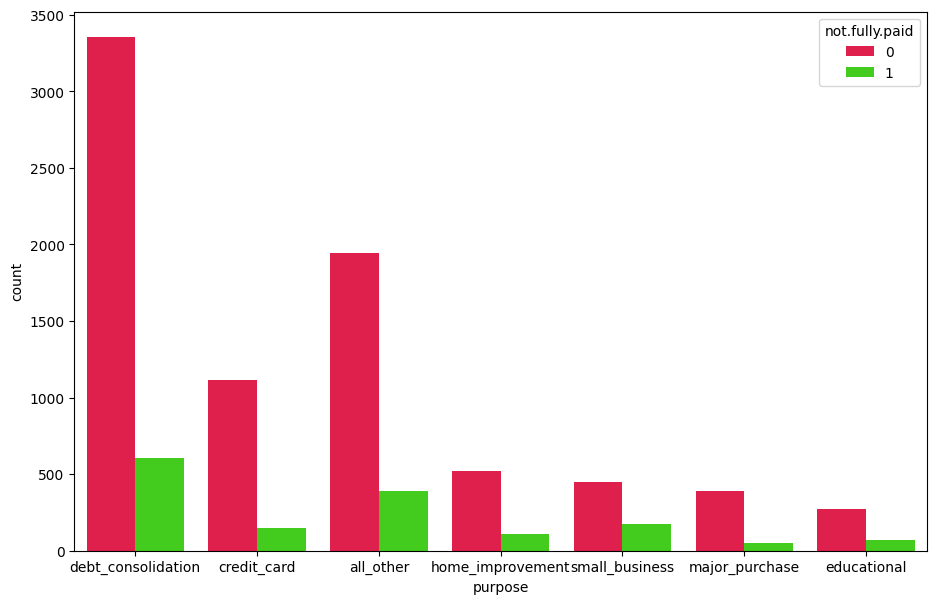

In [ ]:
plt.figure(figsize=(11, 7))
sns.countplot(data=df, x='purpose', hue='not.fully.paid', palette='prism_r')

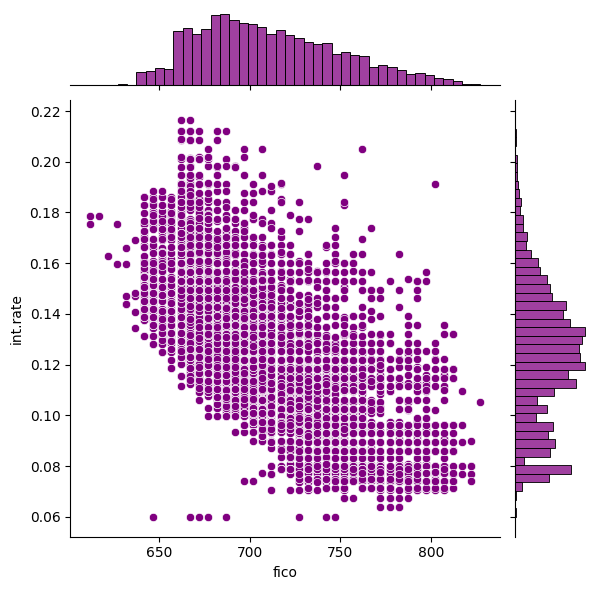

In [ ]:
sns.jointplot(data=df, x='fico', y='int.rate', color='purple')

## 3. Target Variable Preprocessing

In [ ]:
df.rename(columns={'not.fully.paid': 'not_fully_paid'}, inplace=True)

In [ ]:
df.not_fully_paid.describe()

count    9578.000000
mean        0.160054
std         0.366676
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: not_fully_paid, dtype: float64

In [ ]:
df.not_fully_paid.isnull().sum()

0

In [ ]:
df.not_fully_paid.value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

<Axes: xlabel='count', ylabel='not_fully_paid'>

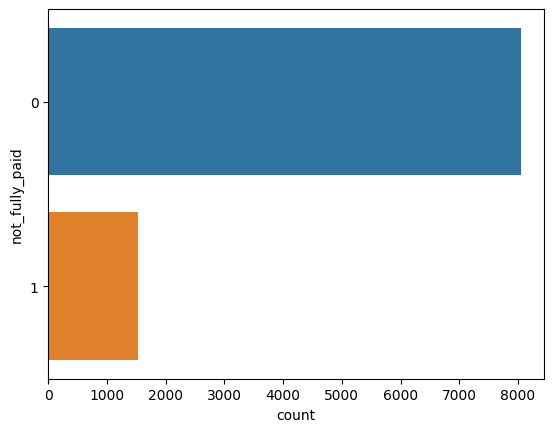

In [ ]:
sns.countplot(data=df, y='not_fully_paid',)

In [ ]:
target = df.not_fully_paid

In [ ]:
df = df.drop(columns=['not_fully_paid'])

## 4. Handling Missing Values

In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
dtype: int64

<Axes: >

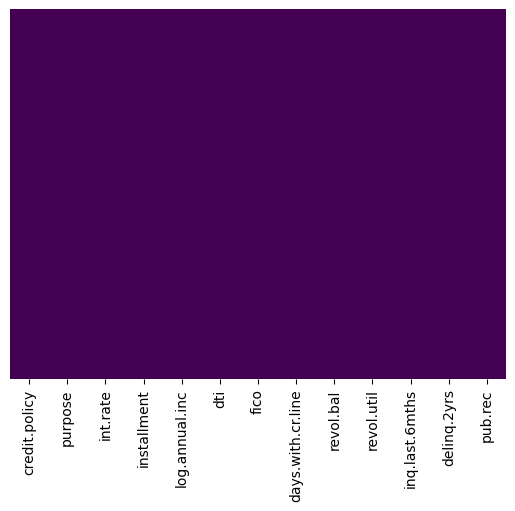

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 5. Handling Categorical features

In [ ]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
dtype: object

> **purpose**

In [ ]:
df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

## 6. Check Correlations

In [ ]:
df['Target'] = target

In [ ]:
df.corr()[['Target']].style.background_gradient(cmap='Greens')

,Target
credit.policy,-0.158119
int.rate,0.159552
installment,0.049955
log.annual.inc,-0.033439
dti,0.037362
fico,-0.149666
days.with.cr.line,-0.029237
revol.bal,0.053699
revol.util,0.082088
inq.last.6mths,0.149452


## 7. Train_Test_Split

In [ ]:
y = df["Target"]
X = df.drop(columns='Target')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## **Decision Tree**

## 8. Define, Fit

In [ ]:
dtclf_model = DecisionTreeClassifier()
dtclf_model.fit(X_train, y_train)

DecisionTreeClassifier()

## 9. Predict, Evaluate

In [ ]:
dtclf_predictions = dtclf_model.predict(X_val)

In [ ]:
print(classification_report(y_val, dtclf_predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.21      0.21       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [ ]:
print(confusion_matrix(y_val, dtclf_predictions))

[[2001  407]
 [ 366  100]]


## **Random Forest**

## 8. Define, Fit

In [ ]:
rfclf_model = RandomForestClassifier()
rfclf_model.fit(X_train, y_train)

RandomForestClassifier()

## 9. Predict, Evaluate

In [ ]:
rfclf_predictions = rfclf_model.predict(X_val)

In [ ]:
print(classification_report(y_val, rfclf_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.43      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



In [ ]:
print(confusion_matrix(y_val, rfclf_predictions))

[[2395   13]
 [ 456   10]]


> **grid search**

In [ ]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500] }

In [ ]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..................n_estimators=100;, score=0.836 total time=   1.1s
[CV 2/5] END ..................n_estimators=100;, score=0.840 total time=   1.0s
[CV 3/5] END ..................n_estimators=100;, score=0.837 total time=   1.1s
[CV 4/5] END ..................n_estimators=100;, score=0.840 total time=   1.2s
[CV 5/5] END ..................n_estimators=100;, score=0.836 total time=   1.3s
[CV 1/5] END ..................n_estimators=200;, score=0.837 total time=   2.3s
[CV 2/5] END ..................n_estimators=200;, score=0.838 total time=   2.1s
[CV 3/5] END ..................n_estimators=200;, score=0.837 total time=   2.1s
[CV 4/5] END ..................n_estimators=200;, score=0.837 total time=   2.1s
[CV 5/5] END ..................n_estimators=200;, score=0.835 total time=   2.1s
[CV 1/5] END ..................n_estimators=300;, score=0.838 total time=   3.7s
[CV 2/5] END ..................n_estimators=300;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]}, verbose=3)

In [ ]:
grid.best_params_

{'n_estimators': 400}

In [ ]:
grid.best_estimator_

RandomForestClassifier(n_estimators=400)

In [ ]:
grid_predictions = grid.predict(X_val)

In [ ]:
print(classification_report(y_val, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.36      0.01      0.02       466

    accuracy                           0.84      2874
   macro avg       0.60      0.50      0.46      2874
weighted avg       0.76      0.84      0.77      2874



In [ ]:
print(confusion_matrix(y_val, grid_predictions))

[[2401    7]
 [ 462    4]]
